In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from hottbox.core import Tensor

[Return to Table of Contents](./0_Table_of_contents.ipynb)

# Tensors and basic operations

<img src="./imgs/tensors_dogs.jpg" alt="Drawing" style="width: 500px;"/>

A tensor is a multi-dimenaional array of data where each dimension is conventionally referred to as the **mode**. Tensor order is defined by the number of its modes which is equivivalent to the number of indices required to identify a particular entry of a multi-dimensional array. For ease of visualisation and compact notation, we consider a third order tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$. Thus, an element of such a tensor, $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$, can be written in a general form as:

$$ x_{ijk} = \mathbf{\underline{X}}[i, j, k]$$

> **Note:** In order to be consistent with Python indexing, count of modes and elements within starts from zeros.

Creation of a tensor starts with a formation of a multidimensional array of data.

In [6]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Result preview
print(tensor)
tensor.data

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## **Assigment 1**

1. Create a tensor of order 5 (of any shape) and with all its values equal to 5. Then, calculate its Frobenious norm. 
2. Construct several tensors of orders varying from 3 to 20, with the size of each dimension equal to 2. Plot the relation between an order of a tensor and the number of its elements.
3. Construct several tensors of order 3 with the size of each dimension varying from 3 to 15. Plot the relation between the size of dimensions of a tensor and the number of its elements.
4. Analyse and compare the so obtained graphs.

### Solution: Part 1

In [7]:
# Create a tensor
t1 = Tensor(np.ones((3,3,3,3)))
print(t1)

This tensor is of order 4 and consists of 81 elements.
Sizes and names of its modes are (3, 3, 3, 3) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.


In [8]:
# Calculate Frobenious norm
np.linalg.norm(t1.data)

9.0

### Solution: Part 2

In [11]:
# Create tensors and collect information
element_counts = []
orders = list(range(3,21))
for i in orders:
    dims = tuple(2*np.ones(i).astype('int'))
    t_current = Tensor(np.zeros(dims))
    element_counts.append(t_current.size)

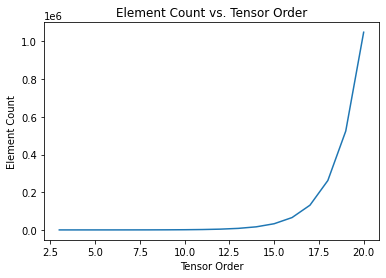

In [13]:
# Plot results
fig = plt.figure()
plt.plot(orders, element_counts)
plt.xlabel('Tensor Order')
plt.ylabel('Element Count')
plt.title('Element Count vs. Tensor Order (dim=2)')
plt.show()

### Solution: Part 3

In [14]:
# Create tensors and collect information
element_counts = []
orders = list(range(3,16))
for i in orders:
    dims = tuple(3*np.ones(i).astype('int'))
    t_current = Tensor(np.zeros(dims))
    element_counts.append(t_current.size)

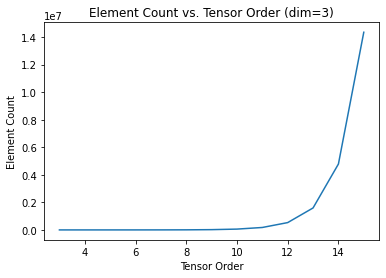

In [15]:
# Plot results
fig = plt.figure()
plt.plot(orders, element_counts)
plt.xlabel('Tensor Order')
plt.ylabel('Element Count')
plt.title('Element Count vs. Tensor Order (dim=3)')
plt.show()

### Solution: Part 4

As shown in the figures above, regardless of the size of each dimension, increasing tensor order (TO) results in an exponential increase in element count (EC), where $EC_{2}(TO) = 2^{TO}$ and $EC_{3}(TO) = 3^{TO}$. Additionally, the larger each dimension size is for a given tensor, the more rapid this exponential growth, as shown by the graphs, where even 5 orders of magnitude below, we get $\frac{EC_{3}(15)}{EC_{3}(20)} \approx 10$ and for large enough TO, $EC_{3}(TO) >> EC_{2}(TO)$.

# Most common tensor substructures
<img src="./imgs/tensor_substructures.png" alt="Drawing" style="width: 500px;"/>

1. A **fiber** is a vector obtained by fixing all but one of the indices, e.g.  $\mathbf{\underline{X}}[i,:,k]$ is the mode-2 fiber $\mathbf{\underline{X}}$ (usually refered to as row fiber). 

1. Fixing all but two of the indices yields a matrix called a **slice** of a tensor, e.g. $\mathbf{\underline{X}}[:,:,k]$ is the mode-[1,2] slice (usually refered to as the frontal slice).

**Note:** The same principles and definitions can be applied to a tensor of an arbitrarily large order. In addition, you can obtain a **subtensor** by fixing at least three indices and letting the remaining ones vary.

In [10]:
# Mode-2 fiber
tensor.data[0,1,:]

array([4, 5, 6, 7])

In [11]:
# Frontal slice
tensor.data[0,:,:]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## **Assigment 2**

1. Create a tensor of order 4 which consists of 81 elements and display all its horizontal slices and any five row fibers.
2. Create a tensor of order 3 and shape `(4,2,5)`, where the values of each consequent frontal slice are doubled.

### Solution: Part 1

In [17]:
# Create a tensor of order 4
t1 = Tensor(np.ones((3,3,3,3)))
print(tensor)

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


In [19]:
# Display slices
for i in range(0,3):
    for j in range(0,3):
        print('tensor({a},:,:,{b})'.format(a=i,b=j))
        print(t1.data[i,:,:,j])
        print()

tensor(0,:,:,0)
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

tensor(0,:,:,1)
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

tensor(0,:,:,2)
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

tensor(1,:,:,0)
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

tensor(1,:,:,1)
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

tensor(1,:,:,2)
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

tensor(2,:,:,0)
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

tensor(2,:,:,1)
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

tensor(2,:,:,2)
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]



In [20]:
# Display fibers
for (i,j) in [(0,0),(0,1),(0,2),(1,0),(1,1)]:
    print('tensor({a},:,{b},1)'.format(a=i,b=j))
    print(t1.data[i,:,j,1])
    print()

tensor(0,:,0,1)
[1. 1. 1.]

tensor(0,:,1,1)
[1. 1. 1.]

tensor(0,:,2,1)
[1. 1. 1.]

tensor(1,:,0,1)
[1. 1. 1.]

tensor(1,:,1,1)
[1. 1. 1.]



### Solution: Part 2

In [22]:
# Create a tensor of order 3
t2 = Tensor(np.ones((4,2,5)))

# Display tensor frontal slices
for i in range(0,5):
    t2.data[:,:,i] *= 2**i
    print('tensor(:,:,{})'.format(i))
    print(t2.data[:,:,i])
    print()

tensor(:,:,0)
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]

tensor(:,:,1)
[[2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]]

tensor(:,:,2)
[[4. 4.]
 [4. 4.]
 [4. 4.]
 [4. 4.]]

tensor(:,:,3)
[[8. 8.]
 [8. 8.]
 [8. 8.]
 [8. 8.]]

tensor(:,:,4)
[[16. 16.]
 [16. 16.]
 [16. 16.]
 [16. 16.]]



# Unfolding

Conventionally, unfolding is considered to be a process of element mapping from a tensor to a matrix. In other words, it arranges the mode-$n$ fibers of a tensor to be the matrix columns. Thus, the mode-$n$ unfolding is denoted as:

$$\mathbf{\underline{A}} \xrightarrow{n} \mathbf{A}_{(n)}$$

Thus, this operations requires to specify a mode along which a tensor will be unfolded. For a third order tensor, a visual representation of such operation is as following

<img src="./imgs/unfolding.png" alt="Drawing" style="width: 600px;"/>

In `hottbox` this functionality is available through the corresponding methods of the `Tensor` object, for instance:

In [16]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Unfolding of a tensor
tensor.unfold(mode=0)

# Result preview
print(tensor)
tensor.data

This tensor is of order 2 and consists of 24 elements.
Sizes and names of its modes are (2, 12) and ['mode-0', 'mode-1_mode-2'] respectively.


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

## **Assigment 3**

1. Create a tensor, $\mathbf{\underline{A}}$, of order 4, in such a way that its version unfolded along the second mode would have sizes `(5,72)`, that is $\mathbf{A}_{(n)} \in  \mathbb{R}^{5 \times 72}$. Validate your results by displaying the unfolded tensor.

### Solution : Part 1

In [23]:
# Create a tensor
t1 = Tensor(np.arange(3*5*3*8).reshape(3,5,3,8))
print(t1)

This tensor is of order 4 and consists of 360 elements.
Sizes and names of its modes are (3, 5, 3, 8) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.


In [24]:
# Display unfolded version
t1.unfold(mode=1)
print(t1)
t1.data

This tensor is of order 2 and consists of 360 elements.
Sizes and names of its modes are (5, 72) and ['mode-1', 'mode-0_mode-2_mode-3'] respectively.


array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23, 120, 121,
        122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
        135, 136, 137, 138, 139, 140, 141, 142, 143, 240, 241, 242, 243,
        244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
        257, 258, 259, 260, 261, 262, 263],
       [ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
         37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
        159, 160, 161, 162, 163, 164, 165, 166, 167, 264, 265, 266, 267,
        268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
        281, 282, 283, 284, 285, 286, 287],
       [ 48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
         61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71, 168, 169,
        170, 171, 172, 173, 174, 175

# Mode-n product 
<img src="./imgs/mode_n_product.png" alt="Drawing" style="width: 600px;"/>

The mode-$n$ product is a multiplication of a tensor  by a matrix along the $n^{th}$ mode of a tensor. This essentially means that each mode-$n$ fiber should be multiplied by this matrix. Mathematically, this can be expressed as:

$$\mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)}  $$

In [19]:
I, J, K = 2, 3, 4
J_new = 5

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

# Create matrix
A = np.arange(J_new * J).reshape(J_new, J)

# Performs Mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)

# Preview of resulting tensor
print(Y)

# Preview of its unfolded version
Y.unfold(mode=1, inplace=False).data

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (2, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[ 20,  23,  26,  29,  56,  59,  62,  65],
       [ 56,  68,  80,  92, 200, 212, 224, 236],
       [ 92, 113, 134, 155, 344, 365, 386, 407],
       [128, 158, 188, 218, 488, 518, 548, 578],
       [164, 203, 242, 281, 632, 671, 710, 749]])

## **Assignment 4**

1. Perform the mode-$n$ product of a 3-rd order tensor, $\mathbf{\underline{X}}$, with a matrix, $\mathbf{A} \in  \mathbb{R}^{5 \times 4}$, provided that the resulting tensor, $\mathbf{\underline{Y}}$, consists of `100` elements. Validate your results. 

> **Note:** You are encouraged to experiment with the optional parameter `inplace` and to investigate its effect on the result.

### Solution: Part 1

In [25]:
# Create original tensor 
t1 = Tensor(np.arange(2*4*10).reshape((2,4,10)))
print(t1)

This tensor is of order 3 and consists of 80 elements.
Sizes and names of its modes are (2, 4, 10) and ['mode-0', 'mode-1', 'mode-2'] respectively.


In [26]:
# Create matrix
A = np.arange(5*4).reshape((5,4))

In [29]:
# Perform mode-n product 
Y = t1.mode_n_product(A, mode=1, inplace=False)
print(Y)

This tensor is of order 3 and consists of 100 elements.
Sizes and names of its modes are (2, 5, 10) and ['mode-0', 'mode-1', 'mode-2'] respectively.


In [28]:
# Validate equivalence between the left and right hand side
Y.unfold(mode=1, inplace=False).data

array([[ 140,  146,  152,  158,  164,  170,  176,  182,  188,  194,  380,
         386,  392,  398,  404,  410,  416,  422,  428,  434],
       [ 380,  402,  424,  446,  468,  490,  512,  534,  556,  578, 1260,
        1282, 1304, 1326, 1348, 1370, 1392, 1414, 1436, 1458],
       [ 620,  658,  696,  734,  772,  810,  848,  886,  924,  962, 2140,
        2178, 2216, 2254, 2292, 2330, 2368, 2406, 2444, 2482],
       [ 860,  914,  968, 1022, 1076, 1130, 1184, 1238, 1292, 1346, 3020,
        3074, 3128, 3182, 3236, 3290, 3344, 3398, 3452, 3506],
       [1100, 1170, 1240, 1310, 1380, 1450, 1520, 1590, 1660, 1730, 3900,
        3970, 4040, 4110, 4180, 4250, 4320, 4390, 4460, 4530]])

# Properties of mode-n product

1. For distinct modes in a series of multiplications, the order of the multiplication is irrelevent: 

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_m \mathbf{B} = \mathbf{\underline{X}} \times_m \mathbf{B} \times_n \mathbf{A} \quad (m \neq n)$$

1. However, this does not hold if the modes are the same :

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A})$$

## **Assignment 5**

1. Validate both of the above properties empirically 
2. Prove the second property analytically

> **Note:** Be aware of consequences of the optional parameter `inplace` (its default value is set to `True`).

### Solution: Part 1

In [31]:
# Create tensor
X = Tensor(np.arange(12).reshape((2,2,3)))
print(X)

This tensor is of order 3 and consists of 12 elements.
Sizes and names of its modes are (2, 2, 3) and ['mode-0', 'mode-1', 'mode-2'] respectively.


In [32]:
# Create matrices
A = np.arange(10).reshape(5,2)
B1 = np.arange(6).reshape(3,2)
B2 = np.arange(10).reshape(2,5)

In [33]:
# Validate property 1
Y1 = X.mode_n_product(A, mode=0, inplace=False) # Different modes
Y1 = Y1.mode_n_product(B1, mode=1, inplace=False)
Y2 = X.mode_n_product(B1, mode=1, inplace=False)
Y2 = Y2.mode_n_product(A, mode=0, inplace=False)
# Display results
print(Y1)
print(Y1.data)
print(Y2)
print(Y2.data)

This tensor is of order 3 and consists of 45 elements.
Sizes and names of its modes are (5, 3, 3) and ['mode-0', 'mode-1', 'mode-2'] respectively.
[[[   9   10   11]
  [  39   44   49]
  [  69   78   87]]

 [[  33   38   43]
  [ 135  160  185]
  [ 237  282  327]]

 [[  57   66   75]
  [ 231  276  321]
  [ 405  486  567]]

 [[  81   94  107]
  [ 327  392  457]
  [ 573  690  807]]

 [[ 105  122  139]
  [ 423  508  593]
  [ 741  894 1047]]]
This tensor is of order 3 and consists of 45 elements.
Sizes and names of its modes are (5, 3, 3) and ['mode-0', 'mode-1', 'mode-2'] respectively.
[[[   9   10   11]
  [  39   44   49]
  [  69   78   87]]

 [[  33   38   43]
  [ 135  160  185]
  [ 237  282  327]]

 [[  57   66   75]
  [ 231  276  321]
  [ 405  486  567]]

 [[  81   94  107]
  [ 327  392  457]
  [ 573  690  807]]

 [[ 105  122  139]
  [ 423  508  593]
  [ 741  894 1047]]]


In [35]:
# Validate property 2
Y3 = X.mode_n_product(A, mode=0, inplace=False) # Different modes
Y3 = Y3.mode_n_product(B2, mode=0, inplace=False)
Y4 = X.mode_n_product(np.matmul(B2,A), mode=0, inplace=False)
# Display results
print(Y3)
print(Y3.data)
print(Y4)
print(Y4.data)

This tensor is of order 3 and consists of 12 elements.
Sizes and names of its modes are (2, 2, 3) and ['mode-0', 'mode-1', 'mode-2'] respectively.
[[[ 420  550  680]
  [ 810  940 1070]]

 [[1170 1525 1880]
  [2235 2590 2945]]]
This tensor is of order 3 and consists of 12 elements.
Sizes and names of its modes are (2, 2, 3) and ['mode-0', 'mode-1', 'mode-2'] respectively.
[[[ 420  550  680]
  [ 810  940 1070]]

 [[1170 1525 1880]
  [2235 2590 2945]]]


### Solution: Part 2

Use [LaTeX syntax](https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook) for analytical deriviations for the second property below.


In [39]:
%%latex

As shown empirically, while the order of consecutive mode-n multiplications can be reversed given each operation
acts upon a different mode, when both act on the same mode this is not the case, and instead the operation can be
obtained by carrying out mode-n multiplication with the product of the two matrices (opposite order). Consider a 
tensor $\mathbf{\underline{X}}_{d_{1} \times d_{2} \times ... \times d_{TO}}$ and two matrices $\mathbf{A}_{m \times k}$
and $\mathbf{B}_{p \times m}$. Each mode-n multiplication with a matrix can be viewed as applying the linear transformation
of the matrix to each of the mode-n fibers of the tensor, resulting in new fibers of different dimension sizes (unless
a square matrix is used). Therefore, the operation $\mathbf{\underline{X}} \times_{n} \mathbf{A} \times_{n} \mathbf{B}$ can
be carried out as long as $d_{n} = k$, where the first step of the operation results in a tensor with dimension $m$ where 
before it was $d_{n}$. Furthermore, the next step can only be carried out because the second dimension of $\mathbf{B}$
is also $m$. If the operation was attempted in the reverse order ($\mathbf{\underline{X}} \times_{n} \mathbf{B} \times_{n} \mathbf{A}$),
the dimensions would be inconsistent and the operation would not be possible, proving the first step by contradiction.                     

<IPython.core.display.Latex object>

In [43]:
%%latex

Furthermore, from the point of view of mode-n multiplication being treated as a linear transformation applied to all
the mode-n fibers, we can consider the effect of each mode-n multiplication step on a single mode fibre (assumiming consistent matrices).
For a given matrix, $\mathbf{A}$, the first mode-n multiplication would result in the output mode fibers shown below:
$$ \mathbf{x}_{m} = \mathbf{A}\mathbf{x}_{d_{n}} $$
Following a similar logic, the second mode-n multiplication would result in the output mode fibers in form shown below:
$$ \mathbf{x}_{p} = \mathbf{B}\mathbf{x}_{m} = \mathbf{B}\mathbf{A}\mathbf{x}_{d_{n}} =  (\mathbf{B}\mathbf{A})\mathbf{x}_{d_{n}} $$


<IPython.core.display.Latex object>